# Hypergraph modeling with Hypergraphx
<code>Hypergraphx</code> is designed to model and analyze hypergraphs. This is is meant to be an introductory tutorial. For more advanced features, please refer to the official [documentation](hypergraphx.readthedocs.io/en/latest/#).

The easiest way to install hypergraphx is via pip:

    pip install hypergraphx

Start by importing the library:

In [1]:
import hypergraphx as hgx

## Hypergraph manipulation

With <code>hgx</code>, (static, undirected) hypergraphs are modeled with the <code>Hypergraph</code> class. The first part of this tutorial will go through some of its basic functionalities.

There are several ways to create a hypergraph. You can directly pass the hyperedge list to the constructor. At creation, you must also specify whether the hypergraph will allow edge weights or not. If <code>weighted</code> is <code>True</code>, a list of edge weights must be provided via the <code>weights</code> parameter, otherwise a <code>ValueError</code> exception will be thrown.

In [2]:
h = hgx.Hypergraph([(1, 3), 
                    (1, 4), 
                    (1, 2), 
                    
                    (5, 6, 7, 8), 
                    (1, 2, 3)
                   ],
                   
                   weighted=False,
                   #weights=[.4, .5, .9, .3, .3]
                  )

To add nodes, use the corresponding methods.

In [3]:
h.add_node(9) # one at a time
h.add_nodes([10, 11, 12]) # list of nodes

Hyperedges can also be added to the hypergraph via the corresponding methods. In <code>hgx</code>, hyperedges are simply called "edges". Note that if the hypergraph is weighted you must also pass the weights.

If any node does not exist, it will be added automatically.

In [4]:
h.add_edge([9,10,11]) # one at a time
h.add_edges([ # list of edges
    [9,10],
    [9, 11, 12, 13]
]) 

Printing the object displays some of its properties

In [5]:
print(h)

Hypergraph with 13 nodes and 8 edges.
Distribution of hyperedge sizes: {2: 4, 4: 2, 3: 2}


Similarly, <code>hgx</code> also allows to remove nodes and edges.

In [6]:
h.remove_edge([9,11,12,13])
h.remove_node(13)

Let's check the node/edge does not exist anymore

In [7]:
h.check_node(13)

False

In [8]:
h.check_edge([9,11,12,13])

False

Finally, a drawing utility is available in a separate module.

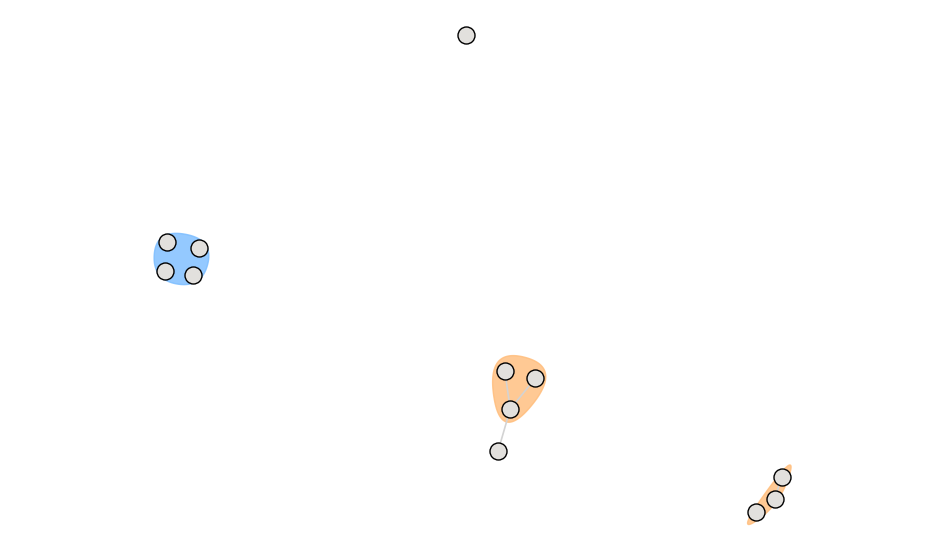

In [9]:
from hypergraphx.viz.draw_hypergraph import draw_hypergraph
draw_hypergraph(h)

## Hypergraph Analysis
In this section, we will go through basic commands to retrieve information from the hypergra To get statistics such as the number of nodes or edges:

In [10]:
h.num_nodes()

12

In [11]:
h.num_edges()

7

To get the list of nodes:

In [12]:
h.get_nodes()

[1, 3, 4, 2, 5, 6, 7, 8, 9, 10, 11, 12]

To get the hyperedge list:

In [13]:
h.get_edges()

[(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3), (9, 10, 11), (9, 10)]

The <code>Hypergraph</code> object can act as an iterator over the **hyperedges**. Note this is different from e.g., <code>networkx</code>, where a similar syntax is used to iterate over nodes.

In [14]:
for edge in h:
    # do something
    pass

The following methods return booleans describing some characteristics of the hypergraph.

In [15]:
h.is_uniform(), h.is_weighted(), h.is_connected()

(False, False, False)

The node degree distribution can be computed as follows. This returns a dictionary mapping degrees to the number of nodes having that degree

In [16]:
h.degree_distribution()

{4: 1, 2: 4, 1: 6, 0: 1}

To visually inspect node degree distribution:

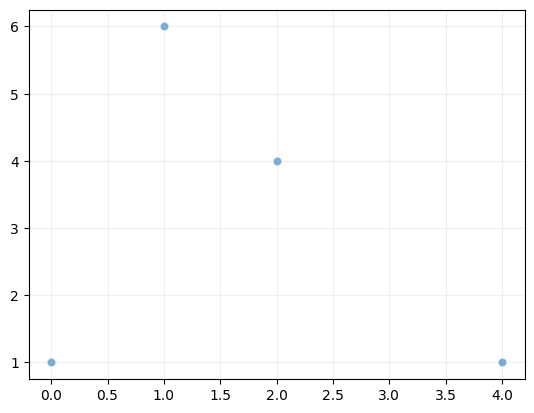

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cnt = h.degree_distribution()
deg = cnt.keys()
freq = cnt.values()
ax = sns.scatterplot(x=deg, y=freq, alpha=.6)
ax.grid(alpha=.2)
#ax.loglog()

Similarly, we can compute the hyperedge size distribution. The <code>get_sizes</code> method returns a list of sizes. 

In [18]:
h.get_sizes()

[2, 2, 2, 4, 3, 3, 2]

We first need to count the number of edges for each size with the <code>Counter</code>.

In [19]:
from collections import Counter
Counter(h.get_sizes())

Counter({2: 4, 3: 2, 4: 1})

Then, to display the distribution:

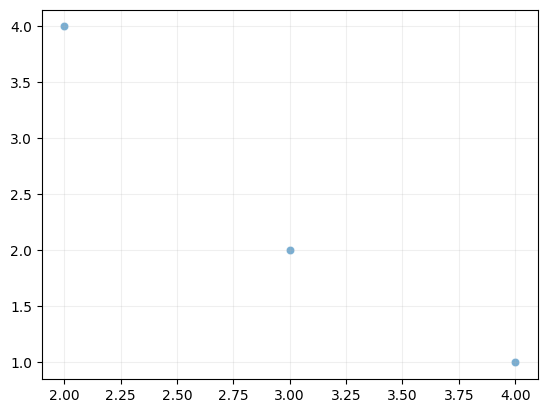

In [20]:
cnt = Counter(h.get_sizes())
deg = cnt.keys()
freq = cnt.values()
ax = sns.scatterplot(x=deg, y=freq, alpha=.6)
ax.grid(alpha=.2)
#ax.loglog()

A useful representation of hypergraph data is the adjacency matrix. Here, rows and columns refer to nodes, and values at the intersections are the number of hyperedges two nodes have in common.


In [21]:
A = h.adjacency_matrix()
A.toarray()

/usr/local/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


array([[0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Another useful representation is the incidence matrix. Here, rows are nodes and columns are hyperedges. Values at the intersections tell whether a hyperedge contains (1) a node or not (0).

In [23]:
A = h.incidence_matrix() 
A.toarray()

array([[1, 1, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

## Other measures and utilities
<code>hgx</code> offers a wide variety of features, including higher-order community detection, synthetic hypergraph generation, and motifs. However, as this is meant to be an introductory tutorial, we will leave these features for you to explore. Nevertheless, here are some methods you might find useful.

#### creating a random hypergraph with controlled number of nodes and hyperedge size distribution

In [47]:
from hypergraphx.generation.random import random_hypergraph
rh = random_hypergraph(20, {2:7 , 3: 5, 4: 3})

In [48]:
print(rh)

Hypergraph with 20 nodes and 15 edges.
Distribution of hyperedge sizes: {2: 7, 3: 5, 4: 3}


#### centralities
Recall that pairwise graph measures can be extended to hypergraphs via the s-analysis framework.

In [49]:
from hypergraphx.measures.s_centralities import s_closeness
cls_1 = s_closeness(rh, s=1)
cls_1

{(13, 14): 0.5384615384615384,
 (8, 14): 0.5185185185185185,
 (2, 13): 0.42424242424242425,
 (0, 12): 0.5384615384615384,
 (8, 18): 0.45161290322580644,
 (14, 18): 0.5185185185185185,
 (4, 11): 0.4827586206896552,
 (1, 11, 17): 0.4827586206896552,
 (7, 11, 15): 0.5,
 (2, 6, 14): 0.6363636363636364,
 (6, 13, 16): 0.5384615384615384,
 (4, 15, 19): 0.42424242424242425,
 (0, 3, 14, 18): 0.7,
 (0, 15, 17, 19): 0.6086956521739131,
 (0, 6, 7, 11): 0.7}

In [50]:
cls_3 = s_closeness(rh, s=2)
cls_3

{(13, 14): 0.0,
 (8, 14): 0.0,
 (2, 13): 0.0,
 (0, 12): 0.0,
 (8, 18): 0.0,
 (14, 18): 0.07142857142857142,
 (4, 11): 0.0,
 (1, 11, 17): 0.0,
 (7, 11, 15): 0.07142857142857142,
 (2, 6, 14): 0.0,
 (6, 13, 16): 0.0,
 (4, 15, 19): 0.07142857142857142,
 (0, 3, 14, 18): 0.07142857142857142,
 (0, 15, 17, 19): 0.07142857142857142,
 (0, 6, 7, 11): 0.07142857142857142}

## Hypergraph I/O
The package offers dedicated methods to save/load hypergraphs to files. The supported file types are .json and .pickle

In [51]:
from hypergraphx.readwrite.save import save_hypergraph

In [52]:
save_hypergraph(rh, 'my_hypergraph.json', 'json')

In [53]:
from hypergraphx.readwrite.load import load_hypergraph

In [54]:
h = load_hypergraph('my_hypergraph.json', 'json')
print(h)

Hypergraph with 20 nodes and 15 edges.
Distribution of hyperedge sizes: {2: 7, 3: 5, 4: 3}


## Exercises: Sociopatterns-Infectious
The sociopatterns-infectious network describes the face-to-face behavior of people during the exhibition INFECTIOUS: STAY AWAY in 2009 at the Science Gallery in Dublin.
Nodes represent exhibition visitors; edges represent face-to-face contacts that were active for at least 20 seconds. The network contains the data from the day with the most interactions.

Take a look at the file in *data/sociopatterns-infectious/out.sociopatterns-infectious*. The data is provided as a timestamped, weighted edgelist. The first two columns identify (undirected) edges, the third encodes the weight, while the last one encodes a timestamp.

In [108]:
def load_pairwise_infectious():
    g = nx.Graph()
    with open('data/sociopatterns-infectious/out.sociopatterns-infectious') as f:
        f.readline()
        f.readline()
        for l in f:
            e = l.split()[:2]
            g.add_edge(int(e[0]), int(e[1]))
    return g
    
g = load_pairwise_infectious()

Sometimes, even when data comes as pairwise interactions, it might make sense to study it with an higher-order approach. In this case, for instance, cliques on the face-to-face network describe a group of people facing each other.

**E1: Build a hypergraph from the pairwise graph by the means of all maximal cliques. Remove trivial hyperedges such as pairwise edges or singletons. Subsequently, remove isolated nodes. Then, compute the number of nodes and edges**

**E2: Identify the node with the highest degree. Compute s-closeness centrality for various s values. Is the highest-degree node also the highest ranked by centrality? Is this affected by s? Why?**

In [ ]:
# E2 here

**E3: Plot the degree and hyperedge size distribution of the hypergraph. Then, plot the distribution of the number of neighbors.** Think about the difference between node degree and number of neighbors in a hypergraph scenario.

In [ ]:
# E3 here

# ASH: Attributed Stream-Hypergraphs

In the remaining part of the lab, we will introduce <code>ash</code>,  a Python software package that allows to represent and analyze dynamic hypergraphs enriched with node attributes.

The library is available via pip and conda. However, the latest developmental version contains various bug fixes so its installation is strongly suggested via:
    
    pip install git+https://github.com/GiulioRossetti/ASH.git 

Note: this will install a nightly build. In the next release, the API will change widely. This notebook will be updated accordingly when the next release is launched.

We can import the library as <code>ash_model</code>:

In [26]:
import ash_model

### Creating an ASH
Create an empty ASH with no nodes and no edges. During the construction phase the <code>hedge_removal</code> parameter allows to specify if the structure will allow hyperedge removal or not.

In [27]:
from ash_model import ASH

In [28]:
h = ASH(hedge_removal=True)

### Higher-order Interactions in Time
An <code>ASH</code> object can be grown by adding one interaction (i.e., an hyperedge) at a time. Each interaction is univocally defined by an arbitrarily-large set of nodes, and has a start and a end timestamp, indicating its appearance and disappearance times respectively.

In [29]:
h.add_hyperedge({1,2,3,4}, start=0, end=1)

If nodes are not already present in the <code>ASH</code>, they will be automatically added when they appear in an interaction. In the above example the interaction <code>{1,2,3,4}</code> appears at time 0 and vanishes at time 1, thus being present in both timestamps. 

If the <code>end</code> parameter is omitted, the hyperedge will only be active at <code>start</code>. 

Moreover, hyperedges are associated with a unique <code>str</code> identifier of the form "en" where n is a positive number:

In [30]:
h.get_hyperedge_id_set()

{'e1'}

Multiple interactions can be added at the same time: in such scenario all the interactions in the list will have the same appearance and disappearance times.

In [31]:
h.add_hyperedges([{1,2,3}, {2, 3}, {3, 1, 4}], start=1, end=2)

The same method can be used to add any <code>ebunch</code> of interaction. An ebunch is any iterable container of interactions.


In [32]:
import networkx as nx
g = nx.barabasi_albert_graph(n=500, m=3)
h.add_hyperedges(nx.find_cliques(g), start=0)

One of the factors that make <code>ash</code> faster with respect to other hypergraph libraries is the O(1) access it provides to a node's star. That is to say that given a node is is possible to easily get the set of hyperedges it is contained in. It is also possible to conveniently restrict the result to hyperedges of a given size and/or active at a given timestamp:



In [33]:
h.get_star(1) # set of ids of the hyperedges that contain node 1

{'e1',
 'e1082',
 'e109',
 'e1093',
 'e1115',
 'e1157',
 'e1239',
 'e1253',
 'e1259',
 'e1266',
 'e1278',
 'e16',
 'e193',
 'e2',
 'e20',
 'e206',
 'e207',
 'e208',
 'e262',
 'e263',
 'e291',
 'e338',
 'e38',
 'e4',
 'e40',
 'e412',
 'e515',
 'e609',
 'e61',
 'e613',
 'e703',
 'e805',
 'e82',
 'e88',
 'e885',
 'e897'}

In [34]:
h.get_star(1, hyperedge_size=4, tid=0) # set of ids of the hyperedges that contain node 1,
                                       # have size 4
                                       # and are active at time 0

{'e1'}

## Node Profiles: Enrich Your Hypergraph!
As for hyperedges, it is also possible to add one node at a time, specifying start, or start and end timestamps. The same can be done for multiple nodes at a time, which will all have the same start and end timestamps:


In [35]:
# one node at a time
h.add_node(0, start=0)
h.add_node(1, start=0, end=1)

# multiple nodes, same time window
#h.add_nodes([1,2,3], start=0)
#h.add_nodes([4,5,6], start=0, end=1)

To incorporate the semantics on nodes, ash leverages the <code>NProfile</code> class. This structure can be used to contain the attributes of a node:



In [36]:
from ash_model import NProfile
profile = NProfile(node_id=1, name='Alice', party='L') # add attributes at creation
profile.add_attribute('age', 24) # add attribute with dedicated method

Node profiles can be incorporated in the <code>ASH</code> when adding a new node. This allows to model change in the node attributes by adding the same node at different times with different profiles:

In [37]:
profile = NProfile(node_id=1, name='Alice', party='L', age=24)
h.add_node(1, start=0, attr_dict=profile)
profile2 = NProfile(node_id=1, name='Alice', party='R', age=25)
h.add_node(1, start=1, attr_dict=profile2)

To see all information on a node profile through time, you can use the following:

In [38]:
profile = h.get_node_profile(1)
attrs = profile.get_attributes()
attrs

{'t': [[0, 1]],
 'name': {0: 'Alice', 1: 'Alice'},
 'party': {0: 'L', 1: 'R'},
 'age': {0: 24, 1: 25}}

## Time Respecting s-Walks

<code>ash</code> integrates the s-analysis framework to generalize classic graph measures to hypergraphs, and extends it with temporal information. In short, walks are extended to hypergraphs based on a parameter <code>s</code>, which controls the minimum number of common nodes between subsequent hyperedges.

Most of these features are available in the <code>paths</code> module.



In [39]:
from ash_model import paths

h = ASH()
h.add_hyperedge([1,2,3], start=0) # e1
h.add_hyperedge([2,3,4], start=0) # e2
h.add_hyperedge([4,5,6], start=0) # e3
h.add_hyperedge([1,2,3,4,5, 6], start=0) # e4
s = 2

paths.has_s_walk(h, s, "e1", "e3")

True

In [40]:
paths.shortest_s_walk(h, s, "e1", "e3")

['e1', 'e4', 'e3']

In [41]:
paths.average_s_distance(h, s=2)

1.6666666666666667

For more info on the s-analysis framework please refer to the original paper. The novelty with <code>ASH</code> is the extension to the dynamic scenario. This means that <code>ASH</code> is able to compute time-respecting s-walks.

In [42]:
h = ASH()
h.add_hyperedge([1, 2, 3], 0, 1)
h.add_hyperedge([1, 4], 1, 2)
h.add_hyperedge([1, 2, 3, 4], 2, 3)
trsw = paths.time_respecting_s_walks(h, s=1, hyperedge_from='e1', hyperedge_to='e3')

In [43]:
for _, ap in trsw.items():
   walks = paths.annotate_walks(ap)
   print('Fastest:', walks['fastest'])

Fastest: [(TemporalEdge(fr='e1', to='e2', weight=1, tid=1), TemporalEdge(fr='e2', to='e3', weight=2, tid=2))]


In the above example, first we get all time respecting s-walks; then we annotate each path and print the fastest ones. Other choices include fastest, heaviest, and all possible combinations.

In [44]:
print('available walks:\n\n'+ '\n'.join(walks.keys()))

available walks:

shortest
fastest
shortest_fastest
shortest_heaviest
fastest_shortest
fastest_heaviest
foremost
heaviest
heaviest_fastest
heaviest_shortest


## Navigating in Time
The timestamps associated to the hyperedges can be retrieved through:

In [45]:
h.temporal_snapshots_ids()

[0, 1, 2, 3]

Several methods return statistics about the flattened (i.e., static, aggregated) hypergraph. To get the same statistic considering a specific timestamp, you can use the <code>tid</code> parameter

In [46]:
print('Number of nodes:', h.get_number_of_nodes()) # count nodes in the hypergraph
print('Number of nodes at time 2:', h.get_number_of_nodes(tid=5))  # count nodes active at time 5

Number of nodes: 4
Number of nodes at time 2: 0


it is possible to extract a time slice from an ASH, i.e., a time-span hypergraph. This returns a new ASH. Since the hyperedge ids of each hypergraph start at e1, a mapping from old to new hyperedge ids is also returned.

In [47]:
s, eold_to_emew = h.hypergraph_temporal_slice(start=2, end=3)
s.get_hyperedge_id_set()

{'e1'}

In [48]:
eold_to_emew

{'e3': 'e1'}

A dynamic hypernetwork can be also described as stream of interactions, a chronologically ordered list of interactions.
the <code>stream_interactions</code> method returns a generator that streams the interactions in <code>h</code>, where <code>e</code> is a 3-tuple (<code>tid</code>, <code>he_id</code>, <code>op</code>):

- <code>tid</code> is the interactions timestamp

- <code>he_id</code> is the id associated with the corresponding hyperedge

- <code>op</code> is a hyperedge creation or deletion event (respectively +, -)

In [49]:
for e in h.stream_interactions():
   print(e)

(0, 'e1', '+')
(1, 'e2', '+')
(2, 'e3', '+')


## Higher-order mixing patterns
This package allows studying several properties of higher-order systems, particularly with respect to node attributes, how they affect connectivity patterns, and how they change in time. First, let us create a hypergraph with dynamic node attributes.

In [70]:
a = ASH(hedge_removal=True)
a.add_hyperedge([1, 2, 3], 0)
a.add_hyperedge([1, 4], 0)
a.add_hyperedge([1, 2, 3, 4], 0)
a.add_hyperedge([1, 3, 4], 1)
a.add_hyperedge([3, 4], 1)

a.add_node(
    1,
    start=0,
    end=0,
    attr_dict=NProfile(node_id=1, party="L", age=37, gender="M"),
)
a.add_node(
    1,
    start=1,
    end=1,
    attr_dict=NProfile(node_id=1, party="R", age=37, gender="M"),
)
a.add_node(
    2,
    start=0,
    end=0,
    attr_dict=NProfile(node_id=2, party="L", age=20, gender="F"),
)
a.add_node(
    3,
    start=0,
    end=1,
    attr_dict=NProfile(node_id=3, party="L", age=11, gender="F"),
)
a.add_node(
    4,
    start=0,
    end=1,
    attr_dict=NProfile(node_id=4, party="R", age=45, gender="M"),
)

Then, we can compute the hyperedge entropy with respect to categorical attributes

In [71]:
from ash_model import measures

measures.hyperedge_profile_entropy(a, hyperedge_id='e2', tid=0)  

{'party': 1.0, 'gender': 0}

Or the most frequent attribute value and its frequency

In [75]:
measures.hyperedge_profile_purity(a, hyperedge_id='e1', tid=0)  

{'party': {'L': 1.0}, 'gender': {'F': 0.6666666666666666}}

Other statistics include the average degree for each group (i.e., nodes having the same label)

In [76]:
measures.average_group_degree(a, tid=0)

{'party': {'R': 2.0, 'L': 2.3333333333333335}, 'gender': {'F': 2.0, 'M': 2.5}}

With respect to temporal measures, consistency computes the complementary of the entropy of a node's attribute through time. This can tell us whether the node kept the same attribute value over time (1) or not (0)

In [74]:
measures.consistency(a)

defaultdict(dict,
            {1: {'party': 0.0, 'age': 1, 'gender': 1},
             2: {'party': 1, 'age': 1, 'gender': 1},
             3: {'party': 1, 'age': 1, 'gender': 1},
             4: {'party': 1, 'age': 1, 'gender': 1}})

Reading and Writing
-------------------

``ash`` allows to read/write hypernetworks in two ways, either:

 - from/to separate files for interactions and node profiles
 - from/to a single file


The former format allows to read/write interactions and node profiles separately. For the hyperedges:




In [ ]:
from ash_model import readwrite as io
io.write_sh_to_csv(h, filename)
h = io.read_sh_from_csv(filename)

where each row is a tab-separated list of the form ``[nodes -> start, end]``, with ``nodes`` being the members of each interactions, and ``start, end`` the appearance-disappearance times of the interactions.
Likewise, for the profiles:

In [ ]:
io.write_profiles_to_csv(h, filename)
profiles = io.read_profiles_from_csv(filename)

where each row is a comma-separated list of the form ``[node_id, tid, attr1, attr2...]``. Nodes that appear multiple times are stored as a separate row for each time they are active.
Profiles can also be stored as a jsonl file with similar structure:


In [ ]:
io.write_profiles_to_jsonl(h, filename)
    profiles = io.read_profiles_from_jsonl(filename)

The latter format encloses the whole ``ASH`` in a ``json`` file

In [ ]:
io.write_ash_to_json(h, filename)
h = io.read_ash_from_json(filename)